# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

  Dataset: EXPLORATORY DATA ANALYSIS : HABERMAN DATASET: [https://www.kaggle.com/gilsousa/habermans-survival-data-set]
* It is a dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
* Age of patient at time of operation,Patient's year of operation,Number of positive axillary nodes detected ,Survival status.
*  Objective:To Predict the patient will survive after 5 years or not based on their age, Year of operation, No. of positive axilary nodes.




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df= pd.read_csv('./haberman.csv')
import warnings 
warnings.filterwarnings("ignore")
df



,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:

print (df.shape)

(306, 4)


In [ ]:

print (df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
(df['year'].min(),df['year'].max())

(58, 69)

In [ ]:
 (df['age'].min(),df['age'].max())


(30, 83)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,306.0,52.457516,10.803452,30.0,44.0,52.0,60.75,83.0
year,306.0,62.852941,3.249405,58.0,60.0,63.0,65.75,69.0
nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.00,52.0
status,306.0,1.264706,0.441899,1.0,1.0,1.0,2.00,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
df['status'] = df['status'].map({1:'Survived', 2:'Expired'})
df['status']

0      Survived
1      Survived
2      Survived
3      Survived
4      Survived
         ...   
301    Survived
302    Survived
303    Survived
304     Expired
305     Expired
Name: status, Length: 306, dtype: object

In [ ]:


df["status"].value_counts()


Survived    225
Expired      81
Name: status, dtype: int64

In [ ]:
# % of patients who survived after 5 years
S=(225/306)*100
S

73.52941176470588

In [ ]:
# % of patients who expired before 5 years
E=(81/306)*100
E

26.47058823529412

# (3.2) 2-D Scatter Plot

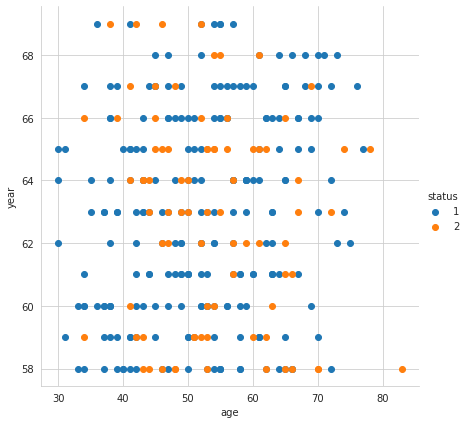

In [ ]:
# 2-D Scatter plot with color-coding for AGE againt YEAR. 
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=6) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();

#  red and blue data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 3C2 = 3.

**Observation(s):**
1. Most of the expired patients age is in between 40 and 70.
2. Year of 60,61,68 and 69 have more survival rate and year of 65 has most mortality rate



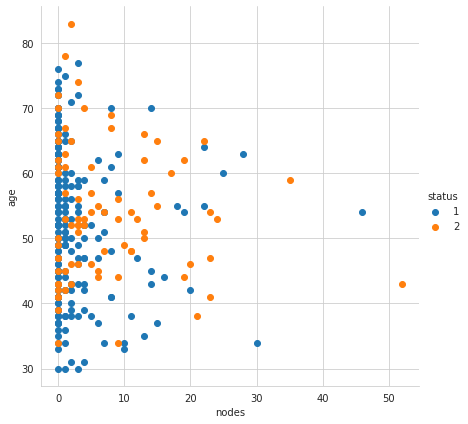

In [ ]:
 
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=6) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend();
plt.show();

#  red and blue data points cannot be easily seperated.

**Observation(s):**
1.Patients whose Age less than 40 and nodes less than 20 have higher chances of survival.

2.Patients whose Age greater than 50 and nodes greater than 10 have less chances of survival


#  (3.3) Pair-plot

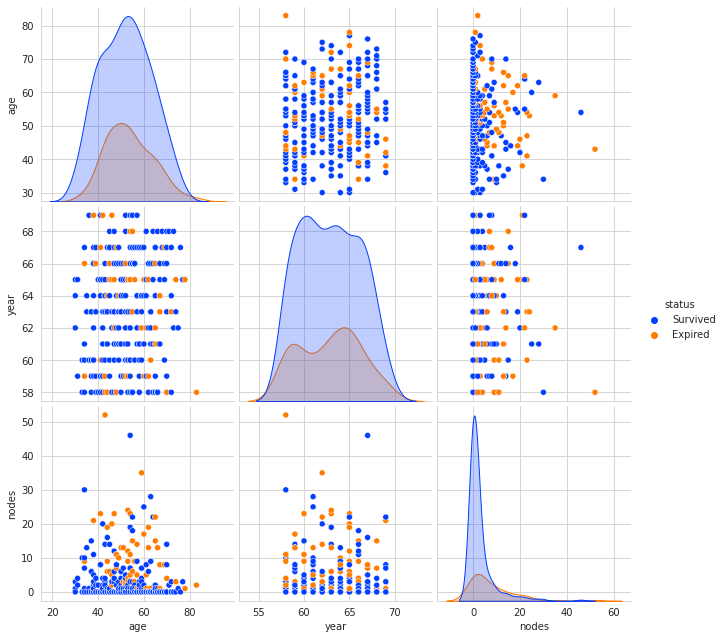

In [ ]:
# pairwise scatter plot: Pair-Plot

plt.close();
sns.set_style("whitegrid")
sns.pairplot(df, hue="status", palette="bright", height=3)
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**

> Indented block

> Indented block




1. Both Survived and expired plots are overlapped so it is not possible to state any observation from pair plot.
2. But every case it is clear number of survival is higher than number of expired.


# (3.4) Histogram, PDF, CDF

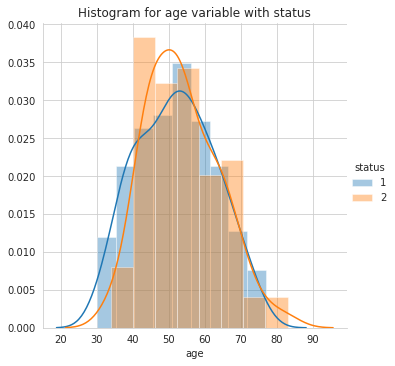

In [ ]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram for age variable with status")
plt.show();



**Observations**
1.Most survived patients are in the range of Age 40 to 60.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


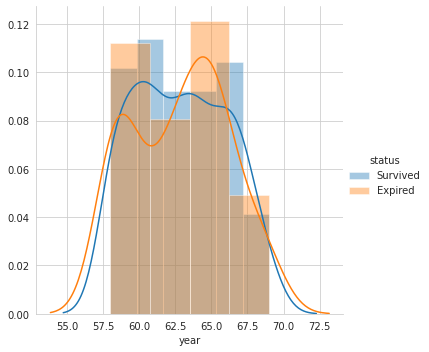

In [ ]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Histogram for year variable with status")   
plt.show();

**Observations**
1. In the year 60 had highest survival rate.

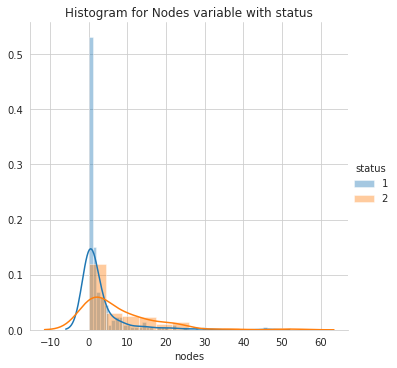

In [ ]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Histogram for Nodes variable with status")   
plt.show();

**Observations**
1. People who survived greater than 5 years are having less no of nodes (-5<= nodes <=4) nodes.

In [ ]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


PDF and CDF anlysis of whole Haberman Data Set

[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


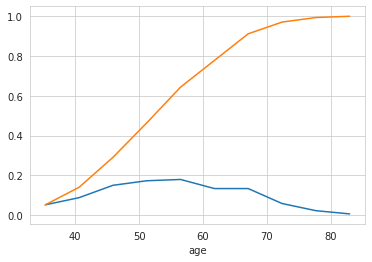

In [ ]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length
sns.set_style("whitegrid")
counts, bin_edges = np.histogram(df['age'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(bin_edges);
print(pdf);
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')
plt.show()

[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


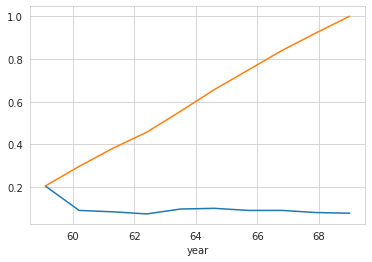

In [ ]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length
counts, bin_edges = np.histogram(df['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(bin_edges);
print(pdf);
print(cdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)
plt.xlabel('year')
plt.show()

[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


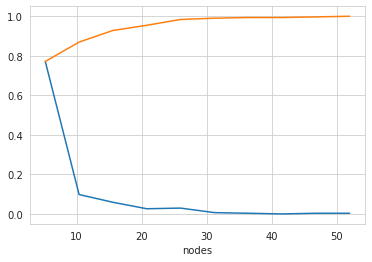

In [ ]:
counts, bin_edges = np.histogram(df['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(bin_edges);
print(pdf);
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.show()


**Observations**
1.77.12% in haberman data set has roughly nodes <=5.2  
2. 86.92% in haberman data set has roughly nodes<=10.4

In [ ]:
Survived = df[df['status'] == 'Survived']
Survived

,age,year,nodes,status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived
...,...,...,...,...
298,73,68,0,Survived
300,74,63,0,Survived
301,75,62,1,Survived
302,76,67,0,Survived


In [ ]:
Expired = df[df['status'] == 'Expired']
Expired

,age,year,nodes,status
7,34,59,0,Expired
8,34,66,9,Expired
24,38,69,21,Expired
34,39,66,0,Expired
43,41,60,23,Expired
...,...,...,...,...
286,70,58,4,Expired
293,72,63,0,Expired
299,74,65,3,Expired
304,78,65,1,Expired


PDF and CDF on Survived patients on different parameters

[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]


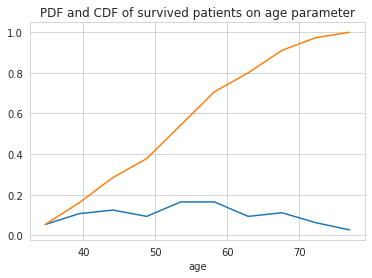

In [ ]:
sns.set_style("whitegrid")
age_counts, bin_edges = np.histogram(Survived['age'], bins=10, 
                                 density = True)

pdf = age_counts/(sum(age_counts))
cdf = np.cumsum(pdf)
print(bin_edges);
print(pdf);
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF of survived patients on age parameter')
plt.xlabel('age')
plt.show()

**Observations**
1. Age between 40-60 has most number of survived patients.
2. 80% of survived patients age is roughly <=63.

[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]


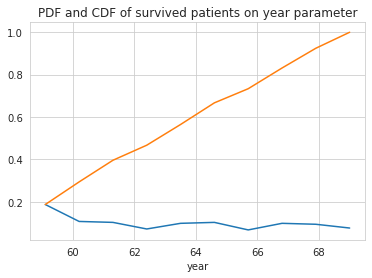

In [ ]:
sns.set_style("whitegrid")
year_counts, bin_edges = np.histogram(Survived['year'], bins=10, 
                                 density = True)

pdf = year_counts/(sum(year_counts))
cdf = np.cumsum(pdf)
print(bin_edges);
print(pdf);
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF of survived patients on year parameter')
plt.xlabel('year')
plt.show()

[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


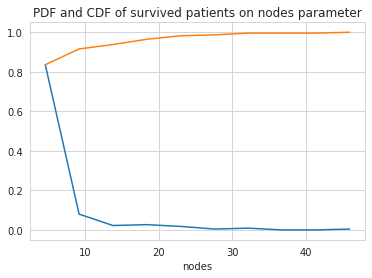

In [ ]:
sns.set_style("whitegrid")
nodes_counts, bin_edges = np.histogram(Survived['nodes'], bins=10, 
                                 density = True)

pdf = nodes_counts/(sum(nodes_counts))
cdf = np.cumsum(pdf)
print(bin_edges);
print(pdf);
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF of survived patients on nodes parameter')
plt.xlabel('nodes')
plt.show()

PDF and CDF on Expired patients on different parameters

[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


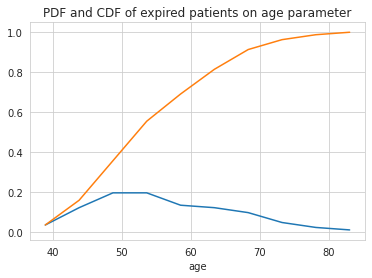

In [ ]:

sns.set_style("whitegrid")
age1_counts, bin_edges = np.histogram(Expired['age'], bins=10, 
                                 density = True)

pdf = age1_counts/(sum(age1_counts))
cdf = np.cumsum(pdf)
print(bin_edges);
print(pdf);
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF of expired patients on age parameter')
plt.xlabel('age')
plt.show()

**Observations**
1. 55.5% of expired patients age is roughly <= 49.

[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


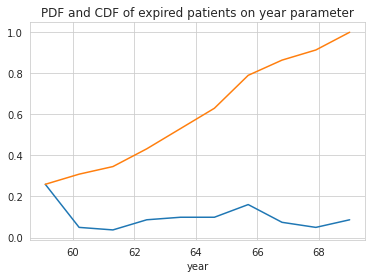

In [ ]:
sns.set_style("whitegrid")
year1_counts, bin_edges = np.histogram(Expired['year'], bins=10, 
                                 density = True)

pdf = year1_counts/(sum(year1_counts))
cdf = np.cumsum(pdf)
print(bin_edges);
print(pdf);
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF of expired patients on year parameter')
plt.xlabel('year')
plt.show()

[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


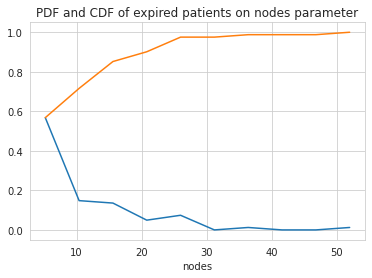

In [ ]:
sns.set_style("whitegrid")
nodes1_counts, bin_edges = np.histogram(Expired['nodes'], bins=10, 
                                 density = True)

pdf = nodes1_counts/(sum(nodes1_counts))
cdf = np.cumsum(pdf)
print(bin_edges);
print(pdf);
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF of expired patients on nodes parameter')
plt.xlabel('nodes')
plt.show()

**Observations**
1. 85% of expired patients have 10+ nodes .

# (3.7) Box plot and Whiskers

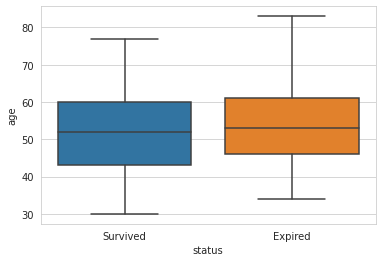

In [ ]:


sns.boxplot(x='status',y='age', data=df)
plt.show()

**Observations**
1.  It can be inferred that patient between age of range 30-34 survived after the treatment.
2. Patients with age > 77 were not able to survive.

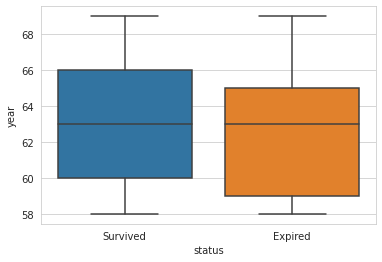

In [ ]:
sns.boxplot(x='status',y='year', data=df)
plt.show()

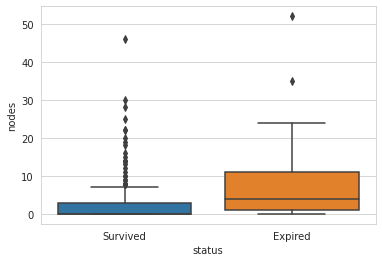

In [ ]:
sns.boxplot(x='status',y='nodes', data=df)
plt.show()

**Observations**
1.  Survival chance is very less with more than 24 auxilary nodes.

# (3.8) Violin plots

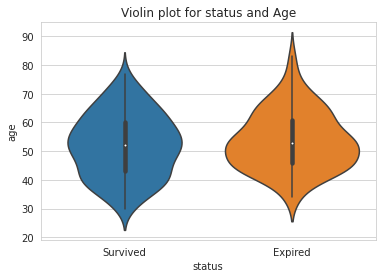

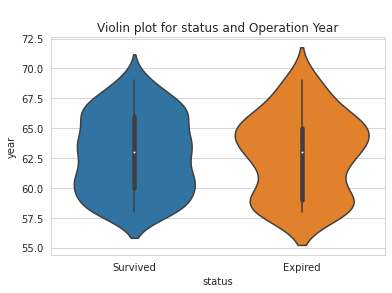

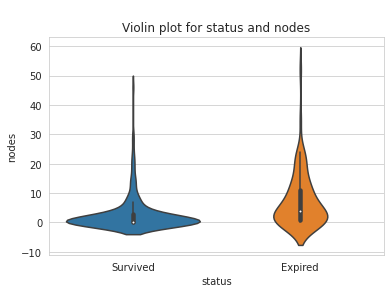

In [ ]:
#@title Default title text
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="age", data=df, size=8)
plt.title("Violin plot for status and Age")
plt.show()

sns.violinplot(x = 'status', y = 'year', data = df)
plt.title("\nViolin plot for status and Operation Year")
plt.show()

sns.violinplot(x = 'status', y = 'nodes', data =df)
plt.title("\nViolin plot for status and nodes")
plt.show()

# (3.9) Summarizing plots in english
* OBJECTIVE : We need to predict whether the patient will survive after 5 years or not based upon the patient's age, year of operation and the number of positive auxillary nodes.

  OBSERVATIONS

* Class label "survival_status" is now labelled as Survived & Expired, stating "Survived" as survived and "Explained" as Not Survived.
*  Dataset is imbalanced and no single value is missing.
* Most of the expired patients age is in between 40 and 70.
Year of 60,61,68 and 69 have more survival rate and year of 65 has most mortality rate.
* Patients whose Age less than 40 and nodes less than 20 have higher chances of survival.

* Patients whose Age greater than 50 and nodes greater than 10 have less chances of survival
* Most survived patients are in the range of Age 40 to 60.
*In the year 60 had highest survival rate.
*  People who survived greater than 5 years are having less no of nodes (-5<= nodes <=4) nodes.  
* 80% of survived patients age is roughly <=63
*There are 90% of Patients, all of whom have Auxillary Nodes <= 10
* Patients between age of range 30-34 survived after the treatment.
* Patients with age > 77 were not able to survive.
* Survival chance is very less with more than 24 auxilary nodes
* 73.5% of patients has been survived and 26.5% of patients has been expired

# (3.11) Multivariate probability density, contour plot.
